In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd



file = r'../data/US06/SP2_0C_US06/02_26_2016_SP20-2_0C_US06_80SOC.xls'
xls = pd.ExcelFile(file)
df = pd.read_excel(xls, 'Channel_1-006')

# df = pd.read_excel(open(file,'rb'), sheet_name='Channel_1-006')


# get colum names
# print(list(df))

# 


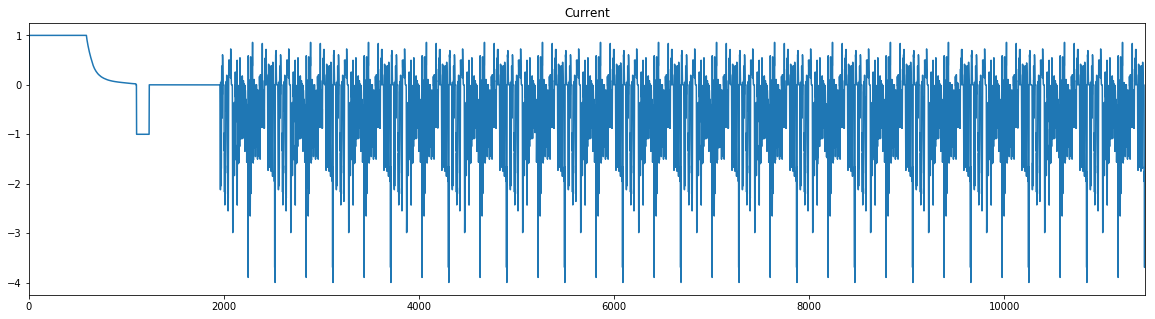

In [2]:
df['Current(A)'].plot(title='Current', figsize=(20, 5))

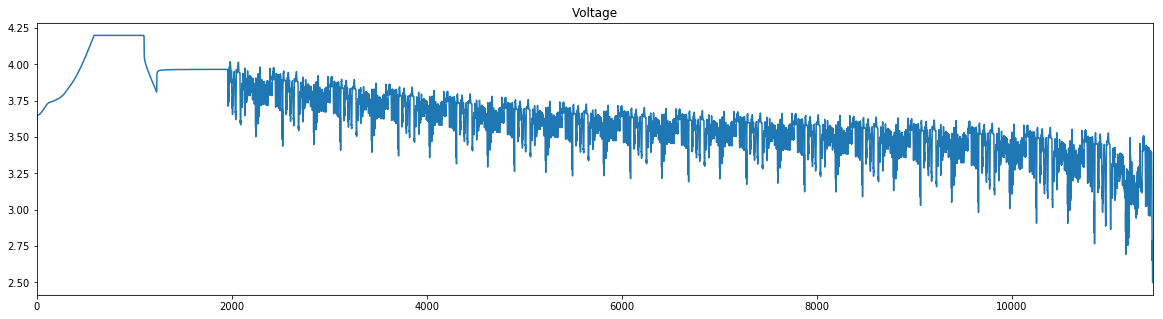

In [3]:
df['Voltage(V)'].plot(title='Voltage', figsize=(20, 5))

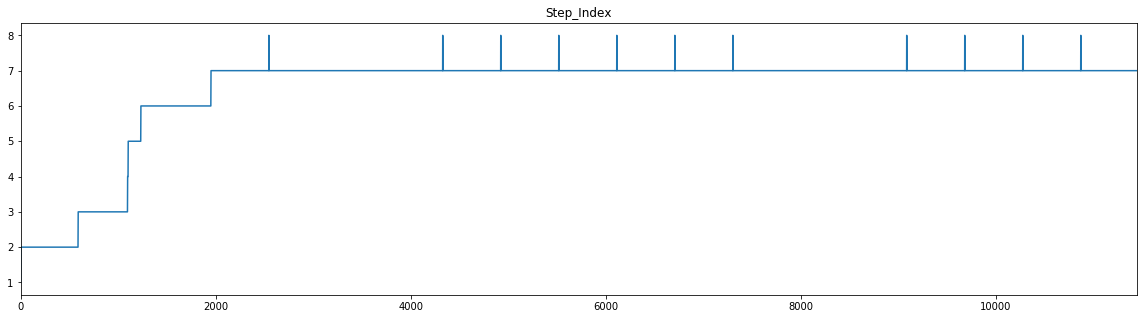

In [4]:
df['Step_Index'].plot(title='Step_Index' , figsize=(20, 5))

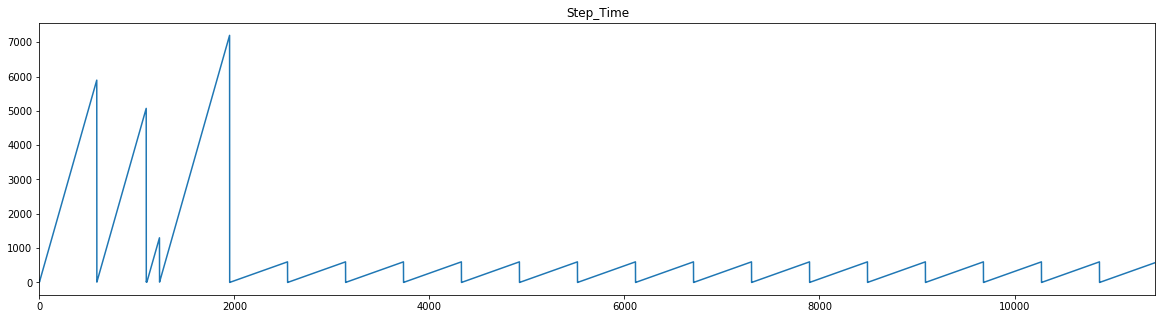

In [5]:
df['Step_Time(s)'].plot(title='Step_Time' , figsize=(20, 5))

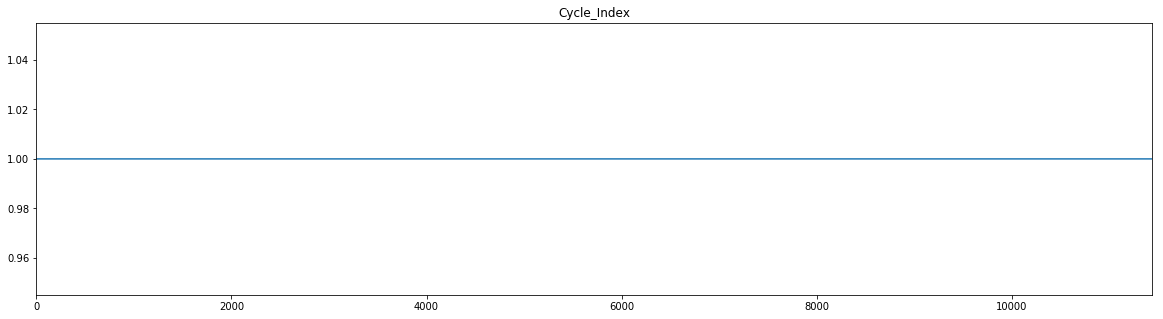

In [6]:
df['Cycle_Index'].plot(title='Cycle_Index' , figsize=(20, 5))

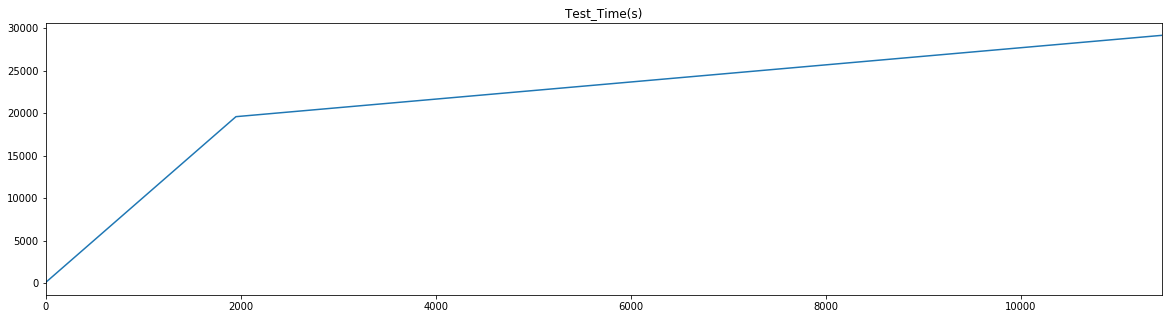

In [7]:
df['Test_Time(s)'].plot(title='Test_Time(s)' , figsize=(20, 5))

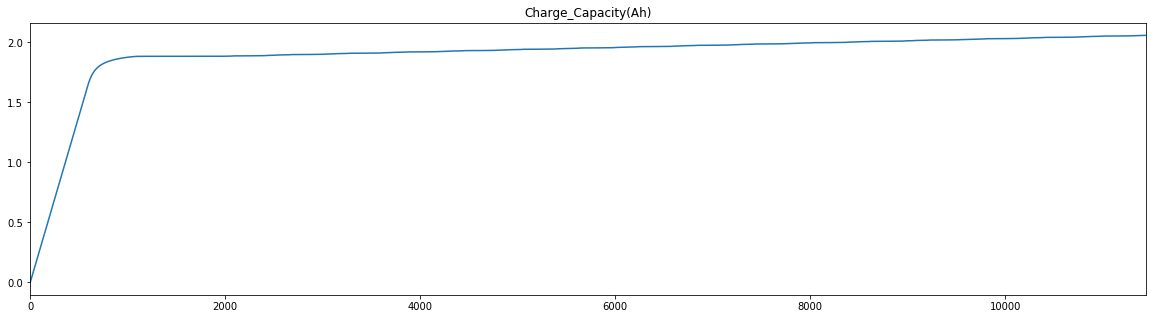

In [8]:
df['Charge_Capacity(Ah)'].plot(title='Charge_Capacity(Ah)' , figsize=(20, 5))

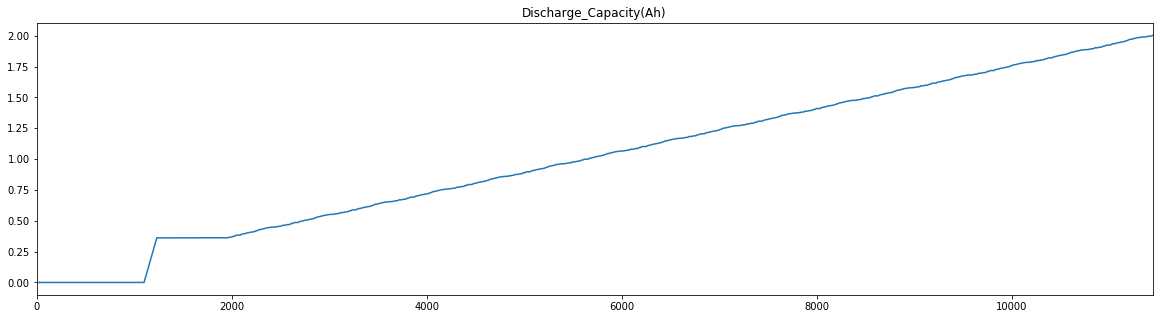

In [9]:
df['Discharge_Capacity(Ah)'].plot(title='Discharge_Capacity(Ah)' , figsize=(20, 5))

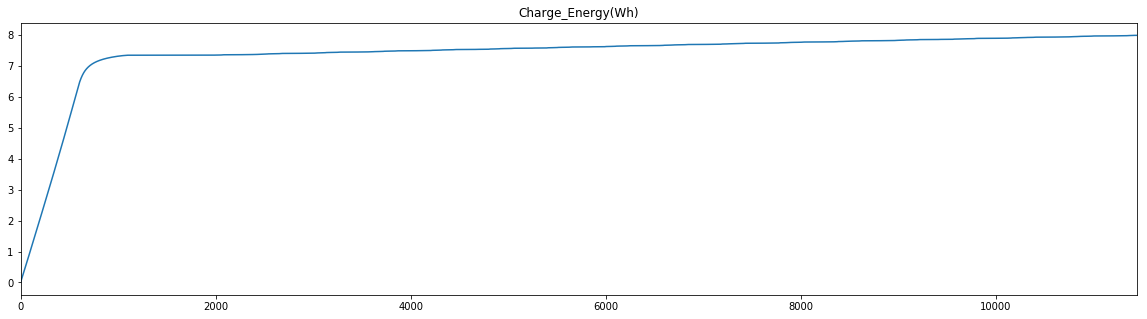

In [10]:
df['Charge_Energy(Wh)'].plot(title='Charge_Energy(Wh)' , figsize=(20, 5))

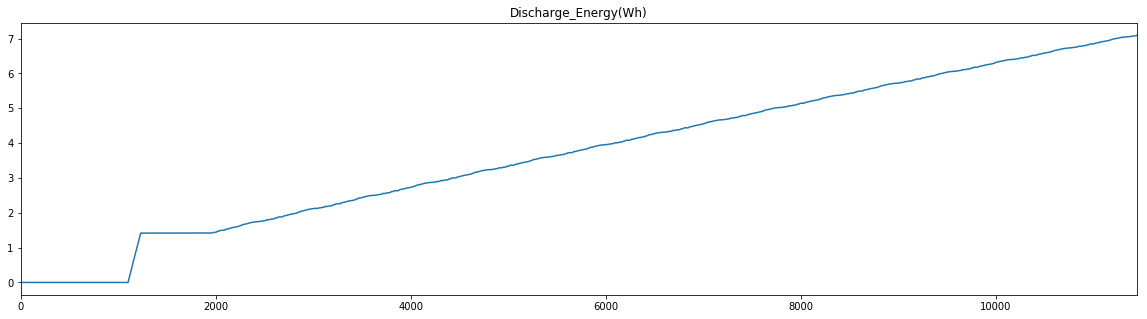

In [11]:
df['Discharge_Energy(Wh)'].plot(title='Discharge_Energy(Wh)' , figsize=(20, 5))

In [12]:
current = df['Current(A)']
voltage = df['Voltage(V)']

import numpy as np

df_soc = df[['Current(A)','Voltage(V)']]

# df_soc['SOC'] = pd.Series([soc_init], index=df.index)
df_soc = df_soc.assign(SOC=pd.Series(np.ones(len(df.index))).values)

df_soc
            

,Current(A),Voltage(V),SOC
0,0.000000,3.446318,1.0
1,0.999713,3.627587,1.0
2,0.999533,3.634876,1.0
3,0.999713,3.639574,1.0
4,0.999713,3.643138,1.0
5,0.999713,3.645082,1.0
6,0.999533,3.646864,1.0
7,0.999893,3.648322,1.0
8,0.999893,3.648808,1.0
9,0.999533,3.649780,1.0


In [13]:
# SOC calculation
for i in range(1, len(df_soc)):
    df_soc.loc[i, 'SOC'] = df_soc.loc[i-1, 'SOC'] + df_soc.loc[i-1, 'Current(A)']/7200

df_soc

,Current(A),Voltage(V),SOC
0,0.000000,3.446318,1.000000
1,0.999713,3.627587,1.000000
2,0.999533,3.634876,1.000139
3,0.999713,3.639574,1.000278
4,0.999713,3.643138,1.000417
5,0.999713,3.645082,1.000555
6,0.999533,3.646864,1.000694
7,0.999893,3.648322,1.000833
8,0.999893,3.648808,1.000972
9,0.999533,3.649780,1.001111


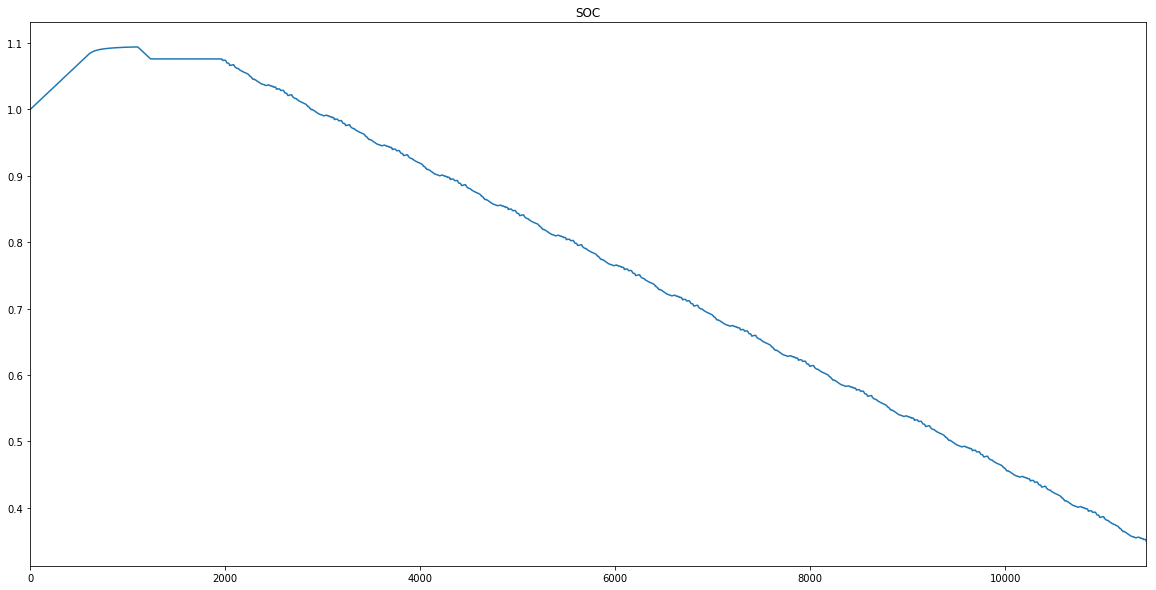

In [14]:
df_soc['SOC'].plot(title='SOC' , figsize=(20, 10))

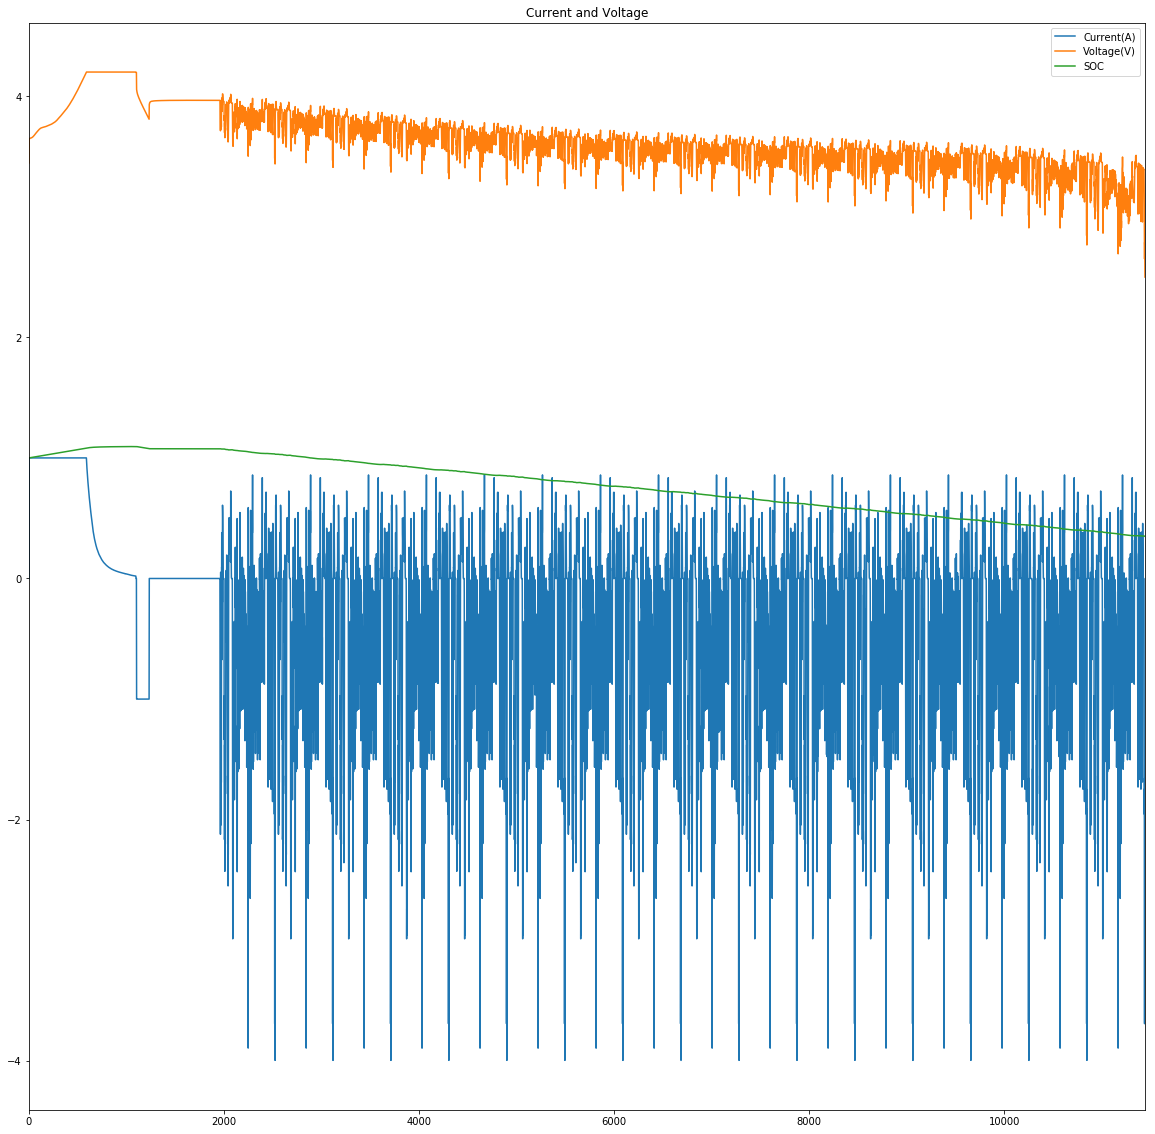

In [15]:
df_soc.plot(title='Current and Voltage' , figsize=(20, 20))
